In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [2]:
# get Personal Loan data
'''
Experience 경력
Income 수입
Famliy 가족단위
CCAvg 월 카드사용량 
Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
Mortgage 가계대출
Securities account 유가증권계좌유무
CD account 양도예금증서 계좌 유무
Online 온라인계좌유무
CreidtCard 신용카드유무 

'''

'\nExperience 경력\nIncome 수입\nFamliy 가족단위\nCCAvg 월 카드사용량 \nEducation 교육수준 (1: undergrad; 2, Graduate; 3; Advance )\nMortgage 가계대출\nSecurities account 유가증권계좌유무\nCD account 양도예금증서 계좌 유무\nOnline 온라인계좌유무\nCreidtCard 신용카드유무 \n\n'

In [3]:
ploan = pd.read_csv('Personal Loan.csv')
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# remove meaningless variables ID, ZIp code
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace=False)

In [5]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed.head()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


### feature variable (x), target variable(Y) differentiation

In [6]:
# loan 
feature_columns = ploan_processed.columns.difference(['Personal Loan'])
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


### logistic regression modeling y = f(x)

In [8]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')


Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.6030
Time:                        05:15:43   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [10]:
results.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [11]:
np.exp(results.params)
## 나이가 한살 많을수록록 대출할 확률이 1.024 높다.
## 수입이 1단위 높을소룩 대출할 확률이 1.05배 높다 
## 가족 구성원수가 1많을수록 대출할 확률이 2.13배 높다
## 경력이 1단위 높을수록 대출할 확률이 0.99배 높다(귀무가설 채택)

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [12]:
# predict y hat
pred_y = results.predict(test_x)
pred_y

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
          ...   
277     0.019982
914     0.959460
542     0.005239
32      0.011344
2360    0.084464
Length: 750, dtype: float64

In [13]:
def cut_off(y,threshold):
    Y = y.copy() # use copy function so that fixes prev y value
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int64

In [14]:
# make confusion matrix
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

[[661  12]
 [ 28  49]]


In [15]:
# calculate the acciracy of confusion matrix
(cfmat[0,0]+cfmat[1,1])/len(pred_Y)

0.9466666666666667

In [16]:
# make a function to find accuracy
def get_accuracy(cfmt):
    return (cfmat[0,0]+cfmat[1,1])/len(pred_Y)

In [17]:
get_accuracy(cfmat)

0.9466666666666667

### comparison of thresh hold value 

In [18]:
# how to determine the threshold value
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = get_accuracy(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC:  0.9463923891858513


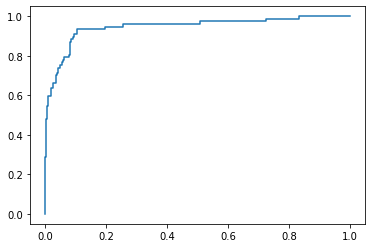

In [19]:
# scikit learn ROC 
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# print ROC curve
plt.plot(fpr, tpr)

# print AUC
auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

In [20]:
# Experience and Morgage 
feature_columns = list(ploan_processed.columns.difference(["Personal Loan", "Experience", "Mortgage"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # loan decision

In [21]:
train_x2, test_x2, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [22]:
# fit logistic 
model = sm.Logit(train_y, train_x2)
results2 = model.fit(method="newton")


Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [23]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.6029
Time:                        05:15:46   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [24]:
# predict
pred_y2 = results2.predict(test_x2)

In [25]:
# threshold 0.5
pred_y2 = cut_off(pred_y, 0.5)

In [26]:
# confusion matrix
cfmat = confusion_matrix(test_y, pred_y2)
print(get_accuracy(cfmat))

0.9466666666666667


In [27]:
#find accuracy
threshold = np.arange(0,1,0.1)
pred_y = results2.predict(test_x2)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_y2 = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_y2)
    table.loc[i] = get_accuracy(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table
    

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


## selecting variables

In [28]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan", "Experience", "Mortgage"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # loan decision

In [29]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 10) (750, 10) (1750,) (750,)


In [30]:
def processSubset(X,y, feature_set): ## https://www.fastcampus.co.kr/courses/200681/clips/
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


'''
단계적 선택법
'''
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [31]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.329912
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330059
         Iterations 6
Processed  9 models on 1 predictors in 0.626655101776123
Selected predictors: ['In

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Optimization terminated successfully.
         Current function value: 0.205431
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205682
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.185721
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205517
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.169107
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.182286
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205561
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205167
         Iterations 8
Processed  8 models on 2 predictors in 0.6852235794067383
Selected predictors: ['Income', 'Education', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object a

In [32]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.216728
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.134831
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131871
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.218281
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.142684
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.155797
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135444
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152482
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131791
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131772
  

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Processed  9 models on 8 predictors in 1.1912333965301514
Selected predictors: ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Family', 'Income', 'Online', 'Securities Account', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7fe5f0fd1790>
Optimization terminated successfully.
         Current function value: 0.135373
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.132650
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.218291
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.142716
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.156410
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.136112
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.153670
         Iterations 9
Optim

In [33]:
Stepwise_best_model = Stepwise_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.330076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.329912
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330059
  

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Processed  9 models on 1 predictors in 0.4973874092102051
Selected predictors: ['Income', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7fe5f1008710>
forward
Optimization terminated successfully.
         Current function value: 0.330076
         Iterations 6
Processed  1 models on 0 predictors in 0.01159358024597168
Selected predictors: ['const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7fe5f15051d0>
Optimization terminated successfully.
         Current function value: 0.205431
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205682
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.185721
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205517
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.169107
         Iterations 8
Optimizatio

Optimization terminated successfully.
         Current function value: 0.133263
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135928
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.136688
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.143335
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154141
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.156593
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.271509
         Iterations 7
Processed  7 models on 6 predictors in 0.7935092449188232
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7fe5f15051d0>
Optimization terminated 

In [43]:
pred_y_full = results.predict(test_x) # full model
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

ValueError: shapes (750,10) and (12,) not aligned: 10 (dim 1) != 12 (dim 0)

In [35]:
pred_Y_full= cut_off(pred_y_full,0.5)
pred_Y_forward = cut_off(pred_y_forward,0.5)
pred_Y_backward = cut_off(pred_y_backward,0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise,0.5)

In [36]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [37]:
print(get_accuracy(cfmat_full))
print(get_accuracy(cfmat_forward))
print(get_accuracy(cfmat_backward))
print(get_accuracy(cfmat_stepwise))


0.9373333333333334
0.9373333333333334
0.9373333333333334
0.9373333333333334


In [44]:
print(len(results.model.exog_names))
print(len(Forward_best_model.model.exog_names))

12
10
